# A Massa

Para calcular isso usarei como referência de PtGNB na qual usarei regra de 3 para achar primeiro a massa de material na solução, supondo que esta é homogênea e depois a massa de metais na solução, sendo único metal o titânio.

Aqui utilizamos $600 \mu L$ de Alcool isopropilíco, $400 \mu L$ de água destilada, $3 mg$ do Mxene e 3 gotas de $DMF$, gerando assim solução a qual terá $2 \mu L$ colocados no eletrodo.

In [1]:
x = (3*2)/(1000) #massa total do MXene por gota em mg.
#porém só é condutor nele o Ti,
print(x)
Ti = 43.83
C = 12.02
#Ti3C2 = 3*Ti+C*2+35+19+27#COM EDS VIQUE TEM CLORO, FLUOR E ALUMINIO AINDA
#porcentage = Ti/Ti3C2
#print(porcentage)
#agora sabemos porcentagem, com ela achamos massa condutora
porcentage = 0.30 #usando como base o EDS
Mass = x*porcentage
print(f'{Mass} mg')
#passando para kg
MassG = Mass*10**(-3)#Massa em gramas
print(MassG)

0.006
0.0018 mg
1.8e-06


# A Capacitância
Aqui será analisadas as voltametrias ciclícas do MXene de $Ti_3AlC_2$ por meio de NaF+LiF (numerado como 1) e NaF+KF (numerado como 2). Por meio dela espero obter a capacitância do material, para fazer isso é necessário entender que a capacitância específica de um material é dada por

$\begin{equation}
    C_p = \frac{Q}{m V},
\end{equation}$

Sendo $m$ a massa de material e $V$ o potência dado. Como $Q = It$

$\begin{equation}
    C_p = \frac{I}{m (V/t)},
\end{equation}$

e $V/t$ é o scan rate, que pode ser escrito como $k$. Então

$\begin{equation}
    \boxed{\frac{I}{m} =C_p k}. 
\end{equation}$

Sendo $I/m$ a área entre as curvas dividia pela massa do material que foi calculada no começo

In [2]:
#importando dados
import pandas as pd
import numpy as np
#primeiro vamos importar do LiF+NaF
data = pd.read_csv(f'M xenes 1 10mv -0,1_0,85.txt',sep=';')
V1 = data['Potential applied (V)'].values
A1 = data['WE(1).Current (A)'].values
data = pd.read_csv(f'M xenes 1 20mv -0,1_0,85.txt',sep=';')
V2 = data['Potential applied (V)'].values
A2 = data['WE(1).Current (A)'].values
data = pd.read_csv(f'M xenes 1 30mv -0,1_0,85.txt',sep=';')
V3 = data['Potential applied (V)'].values
A3 = data['WE(1).Current (A)'].values
data = pd.read_csv(f'M xenes 1 40mv -0,1_0,85.txt',sep=';')
V4 = data['Potential applied (V)'].values
A4 = data['WE(1).Current (A)'].values
data = pd.read_csv(f'M xenes 1 50mv -0,1_0,85.txt',sep=';')
V5 = data['Potential applied (V)'].values
A5 = data['WE(1).Current (A)'].values

#pegando intervalo ótimo e já colocando dividido pela massa
ii = int(len(V1)/5)
V1=V1[ii:2*ii-30]
A1=A1[ii:2*ii-30]
V2=V2[ii:2*ii-30]
A2=A2[ii:2*ii-30]
V3=V3[ii:2*ii-32]
A3=A3[ii:2*ii-32]
A4=A4[ii:2*ii-32]
V4=V4[ii:2*ii-32]
V5=V5[3*ii:4*ii-32]
A5=A5[3*ii:4*ii-32]

A11=A1-min(A1)
A22=A2-min(A2)
A33=A3-min(A3)
A44=A4-min(A4)
A55=A5-min(A5)

-5.458984375e-06


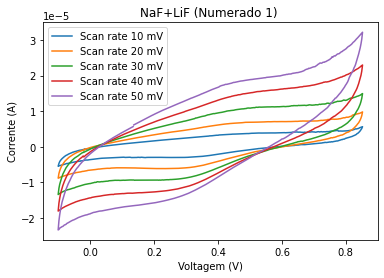

In [3]:
from matplotlib import pyplot as plt
print(min(A1))
plt.plot(V1,A1,'-',label='Scan rate 10 mV')
plt.plot(V2,A2,'-',label='Scan rate 20 mV')
plt.plot(V3,A3,'-',label='Scan rate 30 mV')
plt.plot(V4,A4,'-',label='Scan rate 40 mV')
plt.plot(V5,A5,'-',label='Scan rate 50 mV')
#plt.plot(V1,A11,'-',label='Scan rate 50 mV')

plt.legend()
plt.title('NaF+LiF (Numerado 1) ')
plt.ylabel('Corrente (A)')
plt.xlabel('Voltagem (V)')
plt.show()

[3.7119754105806345e-06, 7.165425494313237e-06, 1.1016461253166202e-05, 1.4747538566589349e-05, 1.8139272257685686e-05]


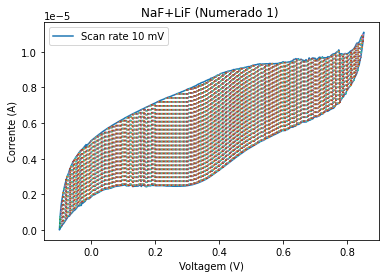

In [4]:
def findlocal(x,x0,u):#acha onde está x0 na lista x se ele ja foi visto no indice u
    for i in range(len(x)):
        if x[i]==x0 and i!=u:
            return i
    return u
def fin(x,x0):
    for i in range(len(x)):
        if x[i]==x0:
            return True
    return False
def newarea(x,y):
    area=0
    gone=[]
    #calcular área como retângulo que vai de um ponto até outro
    for i in range(len(x)-1):
        dx = x[i+1]-x[i]
        y1=y[findlocal(x,x[i+1],i+1)]
        y2 = y[findlocal(x,x[i],i)]
        avg_y1 = (y1-y[i+1])
        avg_y2 = (y2-y[i])
        avg_y = (abs(avg_y1)+abs(avg_y2))/2
        if fin(gone,x[i])==False:
            area+=abs(dx*avg_y)
            gone.append(x[i])
    return area
            
AAe = [newarea(V1,A11),newarea(V2,A22),newarea(V3,A33),newarea(V4,A44),newarea(V5,A55)]
plt.plot(V1,A11,'-',label='Scan rate 10 mV')

print(AAe)
def plotarea(x,y):
    area=0
    gone=[]
    #calcular área como retângulo que vai de um ponto até outro
    for i in range(len(x)-1):
        dx = x[i+1]-x[i]
        y1=y[findlocal(x,x[i+1],i+1)]
        y2 = y[findlocal(x,x[i],i)]
        if fin(gone,x[i])==False:
            gone.append(x[i])
            plt.plot(np.ones(10)*x[i],np.linspace(y2,y[i],10),':')
            plt.plot(np.ones(10)*x[i+1],np.linspace(y1,y[i+1],10),':')
plotarea(V1,A11)

#plt.plot(V2,A2,'-',label='Scan rate 20 mV')
#plt.fill_between(V2, A2, step="pre", alpha=0.4)

#plt.plot(V3,A3,'-',label='Scan rate 30 mV')
#plt.fill_between(V3, A3, step="pre", alpha=0.4)

#plt.plot(V4,A4,'-',label='Scan rate 40 mV')
#plt.fill_between(V4, A4, step="pre", alpha=0.4)

#plt.plot(V5,A5,'-',label='Scan rate 50 mV')
#plt.fill_between(V5, A5, step="pre", alpha=0.4)


#plt.text(19*10**(-2), 0.2*10**(-6), f'Area = {round(Ae3,6)} A', fontsize=10,color = 'black',rotation='0',
#             bbox={'facecolor': 'white', 'alpha': 1, 'pad': 1.85})

#plt.xlim(0,0.05)
plt.legend()
plt.title('NaF+LiF (Numerado 1) ')
plt.ylabel('Corrente (A)')
plt.xlabel('Voltagem (V)')
plt.show()

Fit Parameter: C_p = 202.0+-2.0 F/g
0 = 0.0+-0.0


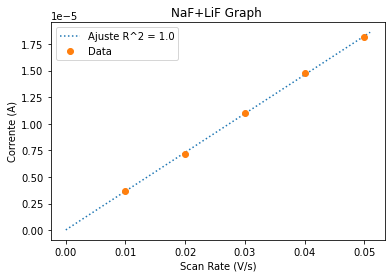

In [5]:
from scipy.optimize import curve_fit
import numpy as np
k = np.array([10,20,30,40,50])
k = k*10**(-3)
def f(x,A,B):
    return A*x+B

popt, pcov = curve_fit(f,k,AAe)
std = np.sqrt(np.diag(pcov))
print(f'Fit Parameter: C_p = {round(popt[0]/MassG,0)}+-{round(std[0]/MassG,0)} F/g')
print(f'0 = {round(popt[1],6)}+-{round(std[1],6)}')
ydata_mean = np.mean(AAe)
SST = np.sum((AAe - ydata_mean)**2)
ydata_fit = f(k, *popt)
SSR = np.sum((AAe - ydata_fit)**2)

x=np.linspace(0,51*10**(-3),50)
plt.plot(x,f(x,popt[0],popt[1]),':',label=f'Ajuste R^2 = {round(1-SSR/SST,3)}')
plt.plot(k,AAe,'o',label='Data')

plt.legend()
plt.title('NaF+LiF Graph ')
plt.xlabel('Scan Rate (V/s)')
plt.ylabel('Corrente (A)')
plt.show()

# MXene NaF + KF

Mesmo procedimento foi feito para esse outro método de Síntese

In [6]:
x = (3*2)/(1000)

porcentage = 0.50
Mass = x*porcentage
print(f'{Mass} mg')
#passando para kg
MassG = Mass*10**(-3)#Massa em gramas
print(MassG)

0.003 mg
3e-06


In [7]:
data = pd.read_csv(f'M xenes 2 10mv -0,1_0,85_2.txt',sep=';')
V1 = data['Potential applied (V)'].values
A1 = data['WE(1).Current (A)'].values
data = pd.read_csv(f'M xenes 2 20mv -0,1_0,85_2.txt',sep=';')
V2 = data['Potential applied (V)'].values
A2 = data['WE(1).Current (A)'].values
data = pd.read_csv(f'M xenes 2 30mv -0,1_0,85.txt',sep=';')
V3 = data['Potential applied (V)'].values
A3 = data['WE(1).Current (A)'].values
data = pd.read_csv(f'M xenes 2 40mv -0,1_0,85.txt',sep=';')
V4 = data['Potential applied (V)'].values
A4 = data['WE(1).Current (A)'].values
data = pd.read_csv(f'M xenes 2 50mv -0,1_0,85.txt',sep=';')
V5 = data['Potential applied (V)'].values
A5 = data['WE(1).Current (A)'].values

#pegando intervalo ótimo e já colocando dividido pela massa
ii = int(len(V1)/5)
V1=V1[ii:2*ii-30]
A1=A1[ii:2*ii-30]
V2=V2[ii:2*ii-30]
A2=A2[ii:2*ii-30]
V3=V3[ii:2*ii-32]
A3=A3[ii:2*ii-32]
A4=A4[2*ii:3*ii-32]
V4=V4[2*ii:3*ii-32]
V5=V5[ii:2*ii-32]
A5=A5[ii:2*ii-32]

A11=A1-min(A1)
A22=A2-min(A2)
A33=A3-min(A3)
A44=A4-min(A4)
A55=A5-min(A5)

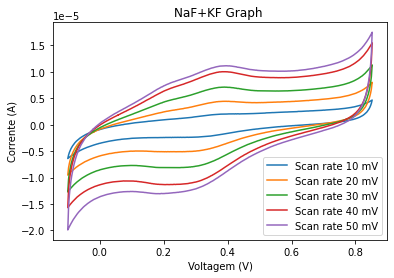

In [8]:
from matplotlib import pyplot as plt
u=358
plt.plot(V1,A1,'-',label='Scan rate 10 mV')
plt.plot(V2,A2,'-',label='Scan rate 20 mV')
plt.plot(V3,A3,'-',label='Scan rate 30 mV')
plt.plot(V4,A4,'-',label='Scan rate 40 mV')
plt.plot(V5,A5,'-',label='Scan rate 50 mV')

plt.legend()
plt.title('NaF+KF Graph ')
plt.ylabel('Corrente (A)')
plt.xlabel('Voltagem (V)')
plt.show()

[3.6487279832363136e-06, 6.79802201688289e-06, 1.0252842456102381e-05, 1.413871966302396e-05, 1.6369217410683635e-05]
[2.7382691949605938e-06, 5.606443360447883e-06, 8.925141841173178e-06, 1.2670531049370772e-05, 1.4826480150222785e-05]


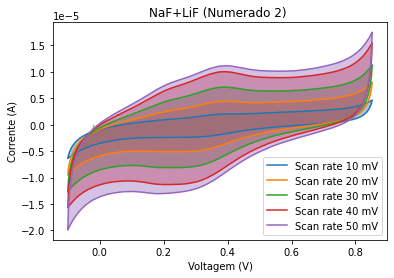

In [9]:
def area_between_points(x,y):
    area = 0
    for i in range(len(x)-1):
        dx = x[i+1] - x[i]
        avg_y = abs((y[i+1] + y[i]))/2
        area += abs(dx) * avg_y
    return abs(area)

def findlocal(x,x0,u):#acha onde está x0 na lista x se ele ja foi visto no indice u
    for i in range(len(x)):
        if x[i]==x0 and i!=u:
            return i
    return u
def fin(x,x0):
    for i in range(len(x)):
        if x[i]==x0:
            return True
    return False
def newarea(x,y):
    area=0
    gone=[]
    #calcular área como retângulo que vai de um ponto até outro
    for i in range(len(x)-1):
        dx = x[i+1]-x[i]
        y1=y[findlocal(x,x[i+1],i+1)]
        y2 = y[findlocal(x,x[i],i)]
        avg_y1 = (y1-y[i+1])
        avg_y2 = (y2-y[i])
        avg_y = (abs(avg_y1)+abs(avg_y2))/2
        if fin(gone,x[i])==False:
            area+=abs(dx*avg_y)
            gone.append(x[i])
    return area
            
Ae1 = area_between_points(V1, A1)
Ae2 = area_between_points(V2, A2)
Ae3 = area_between_points(V3, A3)
Ae4 = area_between_points(V4, A4)
Ae5 = area_between_points(V5, A5)
Ae = [Ae1,Ae2,Ae3,Ae4,Ae5]
print(Ae)
AAe = [newarea(V1,A11),newarea(V2,A22),newarea(V3,A33),newarea(V4,A44),newarea(V5,A55)]
print(AAe)
plt.plot(V1,A1,'-',label='Scan rate 10 mV')
plt.fill_between(V1, A1, step="pre", alpha=0.4)

plt.plot(V2,A2,'-',label='Scan rate 20 mV')
plt.fill_between(V2, A2, step="pre", alpha=0.4)

plt.plot(V3,A3,'-',label='Scan rate 30 mV')
plt.fill_between(V3, A3, step="pre", alpha=0.4)

plt.plot(V4,A4,'-',label='Scan rate 40 mV')
plt.fill_between(V4, A4, step="pre", alpha=0.4)

plt.plot(V5,A5,'-',label='Scan rate 50 mV')
plt.fill_between(V5, A5, step="pre", alpha=0.4)


#plt.text(19*10**(-2), 0.2*10**(-6), f'Area = {round(Ae3,6)} A', fontsize=10,color = 'black',rotation='0',
#             bbox={'facecolor': 'white', 'alpha': 1, 'pad': 1.85})
plt.legend()
plt.title('NaF+LiF (Numerado 2) ')
plt.ylabel('Corrente (A)')
plt.xlabel('Voltagem (V)')
plt.show()

Fit Parameter: C_p = 104.0+-4.0 F/g
0 = -4e-07+-4e-07


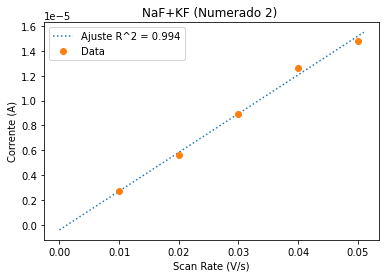

In [10]:
from scipy.optimize import curve_fit
k = np.array([10,20,30,40,50])
k = k*10**(-3)
def f(x,A,B):
    return A*x+B

popt, pcov = curve_fit(f, k,AAe)
std = np.sqrt(np.diag(pcov))
print(f'Fit Parameter: C_p = {round(popt[0]/MassG,0)}+-{round(std[0]/MassG,0)} F/g')
print(f'0 = {round(popt[1],7)}+-{round(std[1],7)}')
ydata_mean = np.mean(AAe)
SST = np.sum((AAe - ydata_mean)**2)
ydata_fit = f(k, *popt)
SSR = np.sum((AAe - ydata_fit)**2)

x=np.linspace(0,51*10**(-3),50)
plt.plot(x,f(x,popt[0],popt[1]),':',label=f'Ajuste R^2 = {round(1-SSR/SST,3)}')
plt.plot(k,AAe,'o',label='Data')

plt.legend()
plt.title('NaF+KF (Numerado 2) ')
plt.xlabel('Scan Rate (V/s)')
plt.ylabel('Corrente (A)')
plt.show()